library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

loading dataset

In [2]:
df = pd.read_csv("D:\\Data Analytics\\projects\\Life Expectancy Data.csv",encoding="utf-8")

inspecting the imported data

In [3]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

searching for null values

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Handling null values

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns

In [8]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [9]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

outlier

<Axes: >

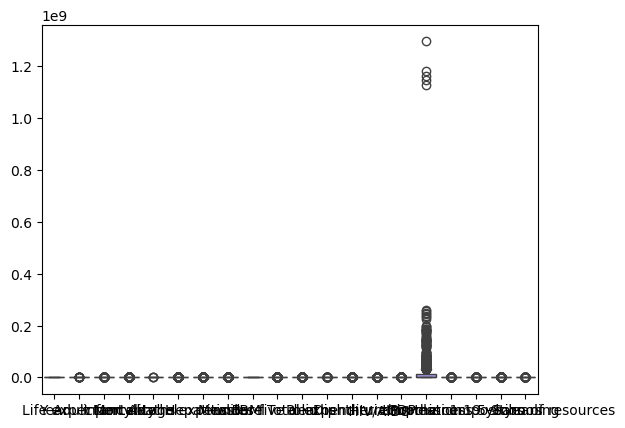

In [10]:
sns.boxplot(data=df)

handle outlier

In [11]:
#identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

In [12]:
#calculate IQR and filter outliers for numeric columns
Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)
IQR=Q3-Q1

df= df[~((df[numeric_cols]<(Q1-1.5*IQR)) | (df[numeric_cols]>(Q3+1.5*IQR))).any(axis=1)]

In [13]:
print("columns in the dataset:")
print(df.columns)
print("\nData types of each column:")
print(df.dtypes)

columns in the dataset:
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Data types of each column:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio       

In [14]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')#convert year to datetime
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')#conert GDP to float

remove duplicates

In [15]:
df=df.drop_duplicates().copy()

In [16]:
if 'Life expectancy' in df.columns and 'income' in df.columns:
    df['new_feature']=df['Life expectancy']/df['Income']
print(df.head())
print(df.columns)

    Country       Year      Status  Life expectancy   Adult Mortality  \
16  Albania 2015-01-01  Developing              77.8             74.0   
17  Albania 2014-01-01  Developing              77.5              8.0   
18  Albania 2013-01-01  Developing              77.2             84.0   
19  Albania 2012-01-01  Developing              76.9             86.0   
20  Albania 2011-01-01  Developing              76.6             88.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
16              0     4.60              364.975229         99.0         0   
17              0     4.51              428.749067         98.0         0   
18              0     4.76              430.876979         99.0         0   
19              0     5.14              412.443356         99.0         9   
20              0     5.37              437.062100         99.0        28   

    ...  Polio  Total expenditure  Diphtheria    HIV/AIDS          GDP  \
16  ...   99.0          

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Standardizing the numeric columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

print(df_scaled.head())


   Life expectancy   Adult Mortality  infant deaths   Alcohol  \
0          0.925264        -0.741362      -0.563457 -0.042332   
1          0.871108        -1.615682      -0.563457 -0.065628   
2          0.816951        -0.608890      -0.563457 -0.000916   
3          0.762794        -0.582395      -0.563457  0.097447   
4          0.708637        -0.555901      -0.563457  0.156982   

   percentage expenditure  Hepatitis B  Measles       BMI   \
0                0.622152     0.951748 -0.403252  0.770615   
1                0.864352     0.837668 -0.403252  0.727321   
2                0.872434     0.951748 -0.403252  0.689438   
3                0.802426     0.951748 -0.341643  0.651556   
4                0.895924     0.951748 -0.211579  0.613673   

   under-five deaths      Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0           -0.555420  0.793480           0.040267     0.808771  -0.418181   
1           -0.471225  0.671577          -0.020154     0.686960  -0.418181   
2 

stats and visualisation

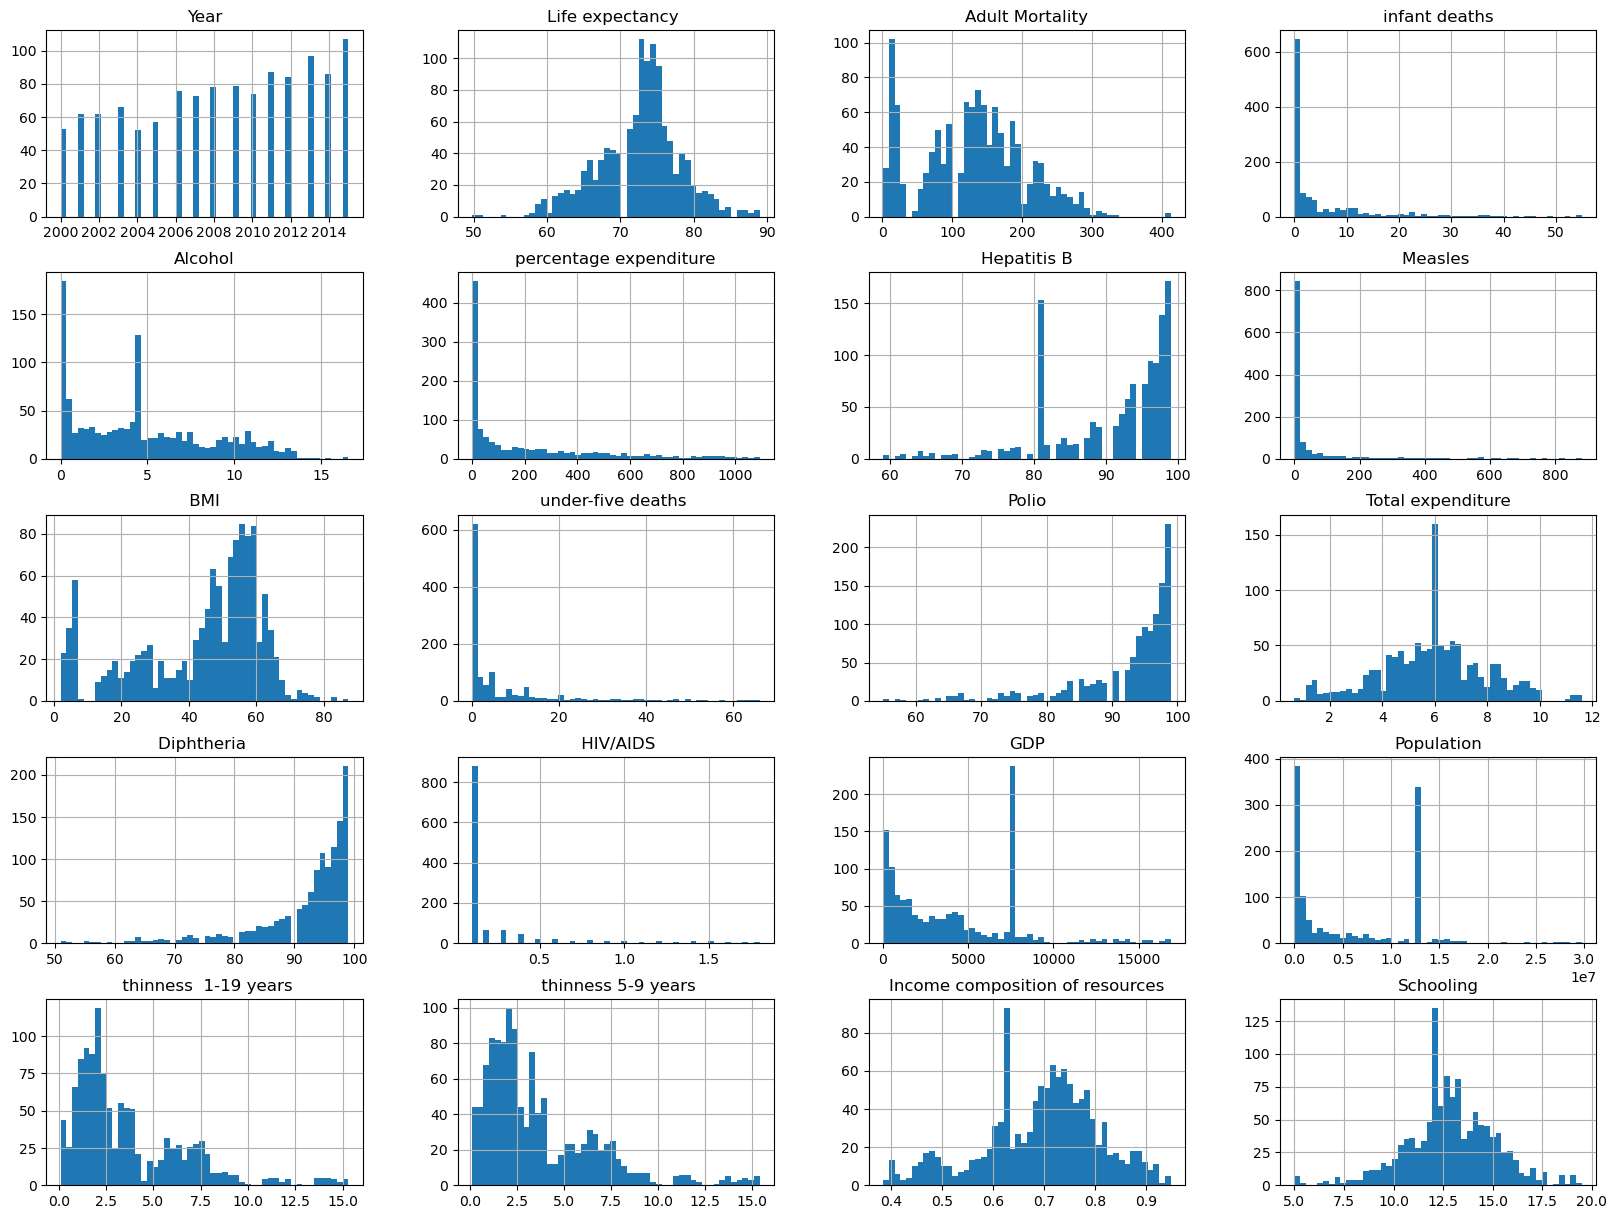

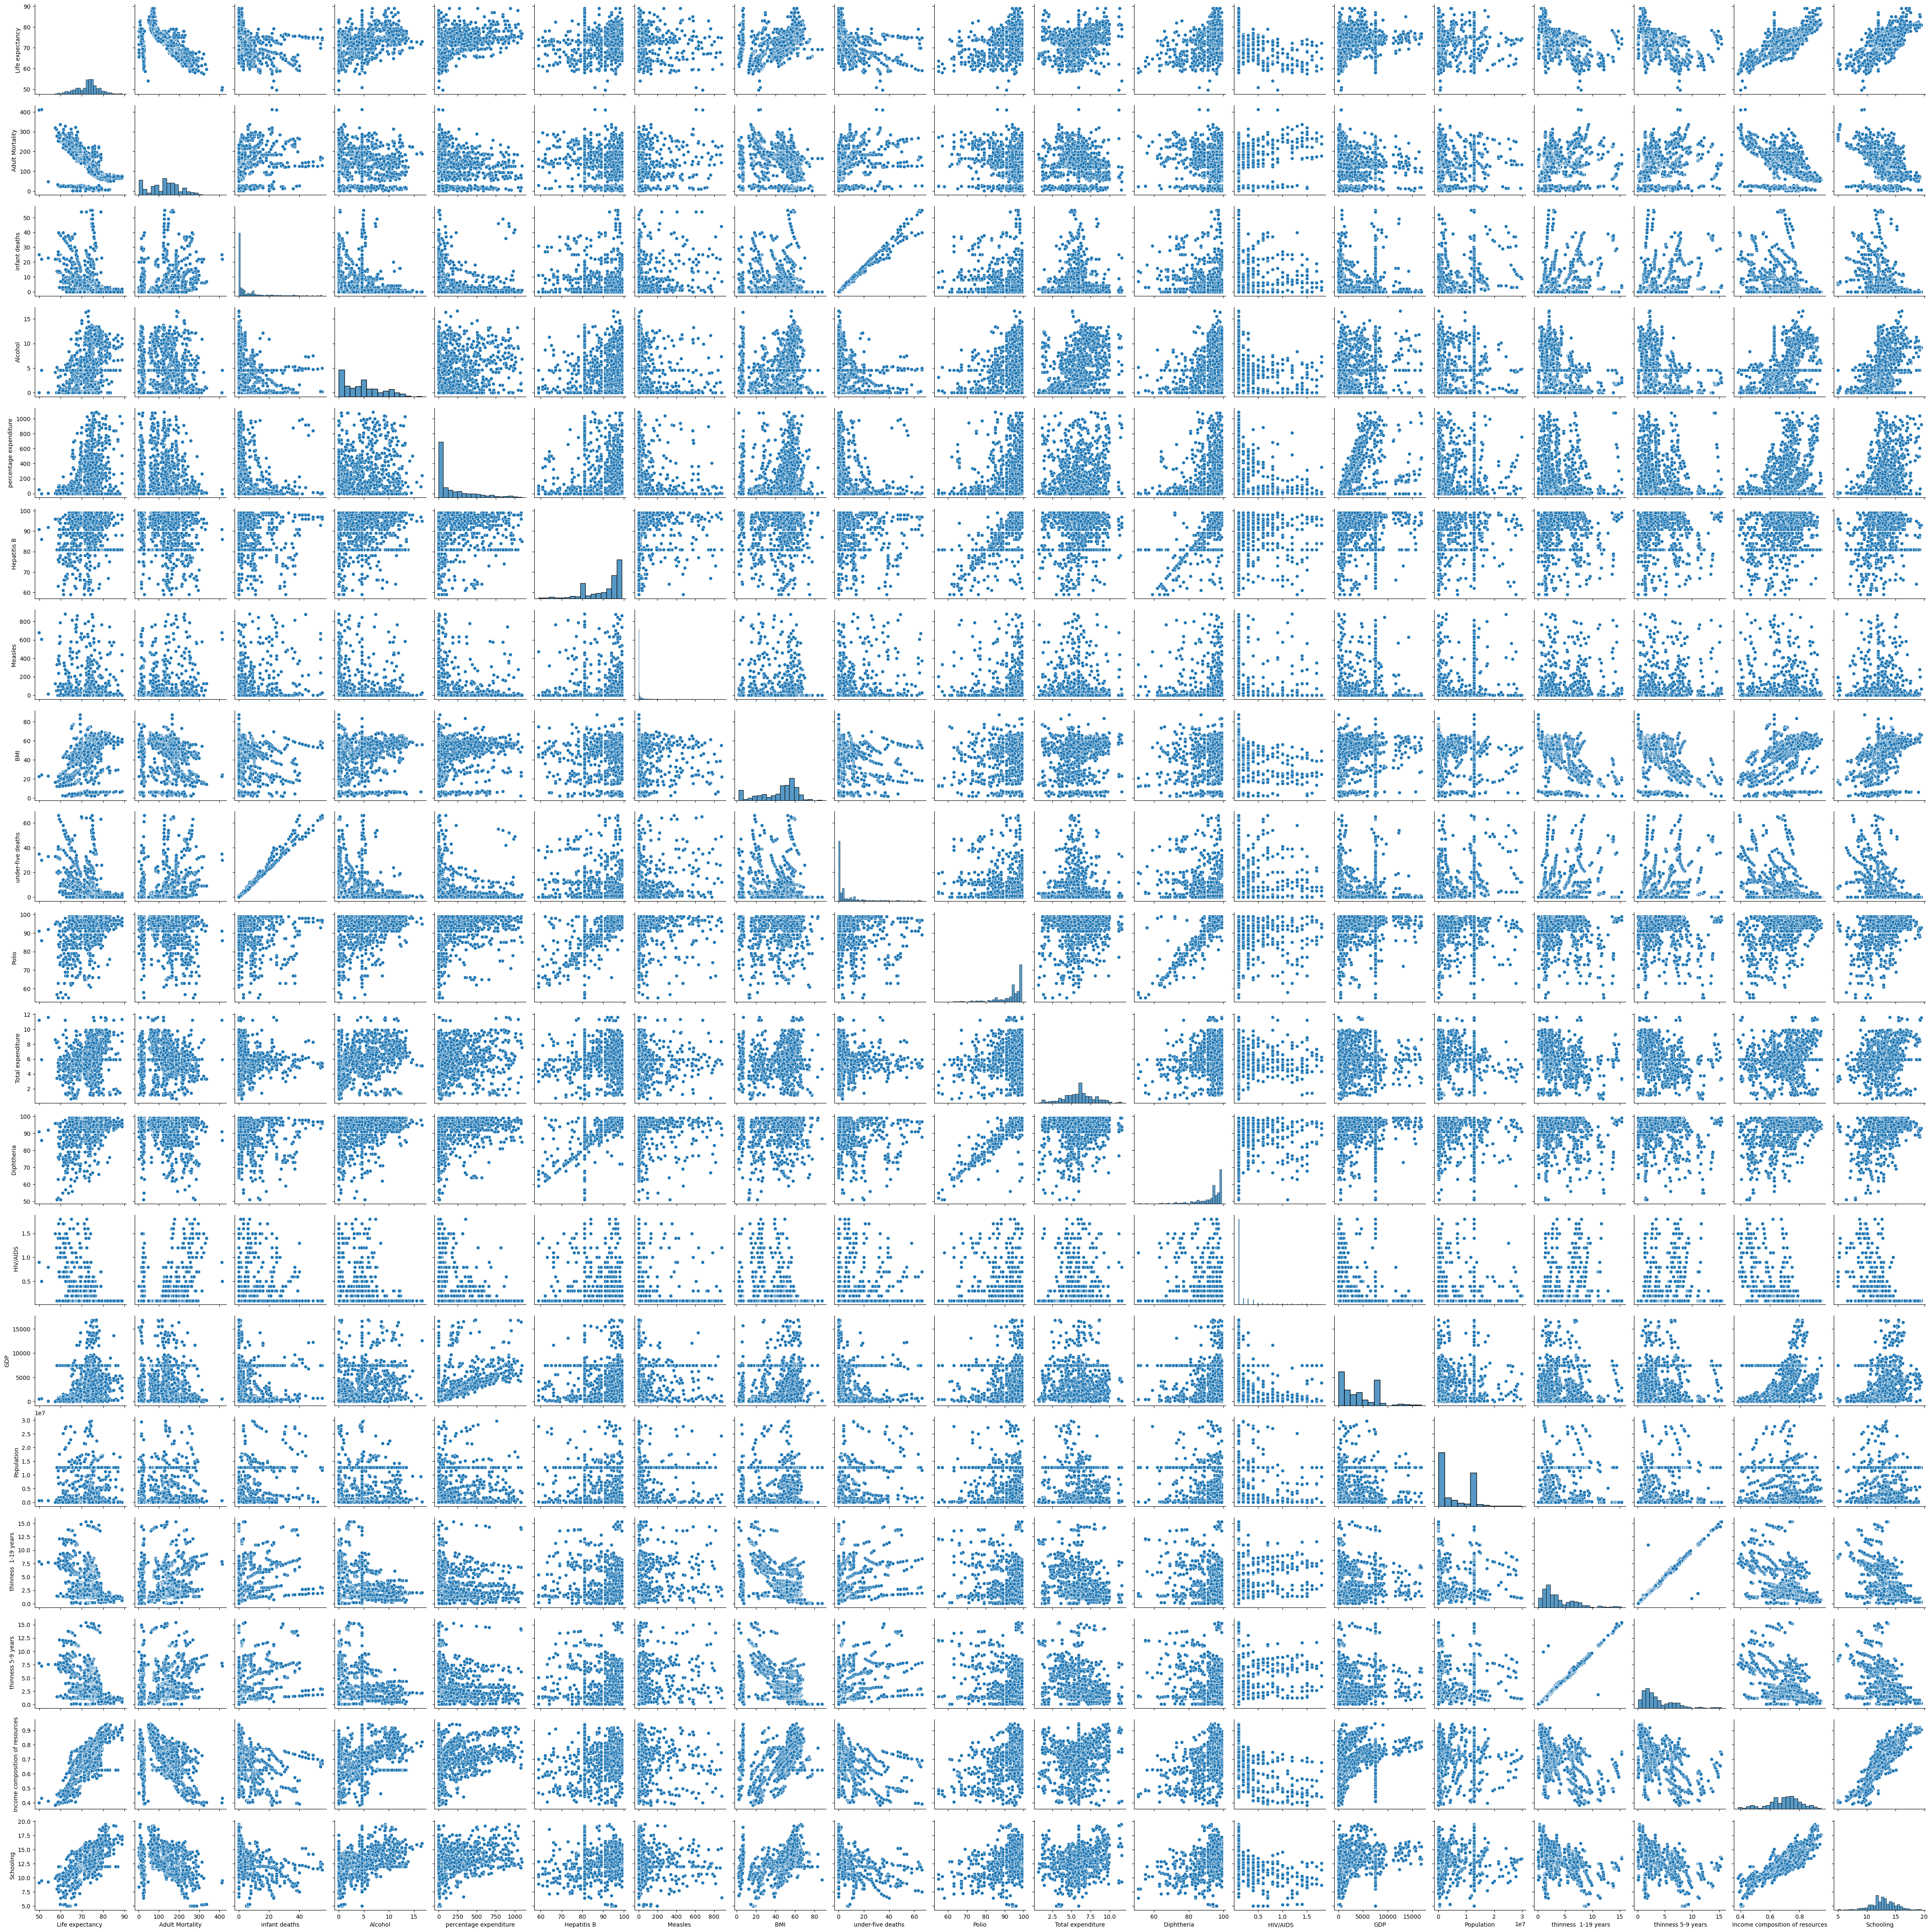

In [18]:
df.hist(bins=50,figsize=(20,15))
plt.show()

sns.pairplot(df)
plt.show()

In [19]:
#ensure data Quality and Integrity
# Check for missing values
assert df.isnull().sum().sum() == 0

# Check for duplicate rows
assert df.duplicated().sum() == 0 


In [20]:
df.to_csv('cleaned_data.csv', index=False)